# [ANONYMISED]

**Name**: Konrad Rzucidlo

**PI**: [ANONYMISED]

Investigation of a dataset of consumption of wine from the UK Government wine cellar, which is used to support the work of Government Hospitality in delivering business hospitality for government ministers and departments.

In [1]:
# This cell imports standard libraries needed for notebook.

import pandas as pd
import chardet
import matplotlib.pyplot as plt

#### Contents

[Data provenance, and importing the data](#provenance)

[Cleaning the data sets](#cleaning)

[Visualising the data](#visualising)

## <a id='provenance'></a>Data provenance, and importing the data

#### 1. Licensing for the wine cellar datasets

The two datasets are stored as csv files called `Annex_B_-_Wine_Cellar_Stock-list_data_07_07_15.csv` and `Wine_Cellar_Consumption_dataset_14-15.csv` in the `data` directory. 

These datasets were obtained from the UK government data portal:

http://data.gov.uk

on 18th April, 2019. The files contains Government information licensed under the [Open Government Licence v3.0](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).


Find the terms of this license, and state:
1. the specific clauses of the licence which allow the OU to distribute the data to you, and
2. the obligations that the licence places upon the OU when distributing the data.

*(2 marks)*


<p><strong>Write your answer in this markdown cell</strong></p>

<p>1. To follow the section &quot;You are free to:&quot; while adhering to the condition set in &quot;You must (where you do any of the above):&quot; while the data itself is not breaking any rule under &quot;Exemptions&quot; section of the licence document.</p>

<p>2. The OU had to provide a specific attribution statement, which they did in the line &quot;<em>on 18th April, 2019. The files contains Government information licensed under the <a href="http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/" target="_blank">Open Government Licence v3.0</a>.</em>&quot;. The OU also provided a hyperlink to a resource that contains the required attribution statements, although both the hyperlink and the quoted previously statement are not necessary. Either one or the other is enough. Also, the OU shall and followed &quot;Non-endorsement&quot; section.</p>


#### 2. Importing the datasets

In [3]:
# 1.check encoding
stocklist_raw_data = open('data/Annex_B_-_Wine_Cellar_Stock-list_data_07_07_15.csv','rb').read()
chardet.detect( stocklist_raw_data )

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [4]:
# 2. load it
stocklist_df = pd.read_csv('data/Annex_B_-_Wine_Cellar_Stock-list_data_07_07_15.csv', encoding = 'windows-1252')

In [5]:
# 3. disaply the preview
stocklist_df[:5]

,Country/Region,Vintage,Product Name,Grade
0,Bordeaux,1955,Château Latour 1955 1er Cru Classé Pauillac,A1
1,Bordeaux,1961,Château Gruaud-Larose 1961 2me Cru Classé St J...,A1
2,Bordeaux,1961,Château Latour 1961 1er Cru Classé Pauillac,A1
3,Bordeaux,1961,Château Margaux 1961 1er Cru Classé Margaux,A1
4,Bordeaux,1962,Château Latour 1962 1er Cru Classé Pauillac,A


Import the file `Wine_Cellar_Consumption_dataset_14-15.csv` into a dataframe named `consumption_df`.

In [6]:
# 1.check encoding
consumption_raw_data = open('data/Wine_Cellar_Consumption_dataset_14-15.csv','rb').read()
chardet.detect( consumption_raw_data )

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [7]:
# 2. load it
consumption_df = pd.read_csv('data/Wine_Cellar_Consumption_dataset_14-15.csv', encoding = 'windows-1252')

In [8]:
# 3. disaply the preview
consumption_df[:5]

,Country/Region,Vintage,Product name,Consumption April 2014 - March 2015
0,ALSACE,2001,"Riesling Wineck-Schlossberg, Meyer-Fonne 2001",8
1,ALSACE,2007,"Alsace Pinot Gris Les Elements, Dom. Bott Geyl...",6
2,ALSACE,2007,Alsace Riesling Domaine Marcel Deiss 2007,4
3,ALSACE,2007,Riesling Kirchberg de Ribeauville 2007 J. Sipp,3
4,ALSACE,2010,"Gewurztraminer Les Princes Abbes, Domaine Schl...",2


## <a id='cleaning'></a>Cleaning the data sets

While investigating the datasets, I noticed that there are several discrepancies in the content of the two sets, so that the values do not always match up in the way you would like. I therefore need to do some *cleaning* of the datasets before creating my visualisation.

First, I noticed that there are some gaps in the consumption list, so that certain years are missing. For example, the file `Wine_Cellar_Consumption_dataset_14-15.csv` contains the row:

|Country/Region|Vintage|Product name|Consumption April 2014 - March 2015|
|-----------|-----------|-----------|-----------|
|ALSACE|2001|Riesling Wineck-Schlossberg, Meyer-Fonne 2001|8|


However, the file `Annex_B_-_Wine_Cellar_Stock-list_data_07_07_15.csv` does not contain any rows in which the value of `Country/Region` is `Alsace` and the value of `Vintage` is `2001`.

#### 3. Converting `Country/Region` values to a standard form

I noticed that the values in the column `stocklist_df['Country/Region']` do not match the values in the column `consumption_df['Country/Region']`. The first thing I noticed is that the case information (ie. the use of capital letters) is inconsistent between the two columns. Add a column `standard_region` to each of the dataframes `stocklist_df` and `consumption_df`. In both cases, the column should contain the value of that row's `Country/Region` column:
- converted to lower case, and
- with any trailing or preceding white space removed.

In [10]:
consumption_df['standard_region']=consumption_df['Country/Region'].str.lower().str.strip()
consumption_df[:5]

,Country/Region,Vintage,Product name,Consumption April 2014 - March 2015,standard_region
0,ALSACE,2001,"Riesling Wineck-Schlossberg, Meyer-Fonne 2001",8,alsace
1,ALSACE,2007,"Alsace Pinot Gris Les Elements, Dom. Bott Geyl...",6,alsace
2,ALSACE,2007,Alsace Riesling Domaine Marcel Deiss 2007,4,alsace
3,ALSACE,2007,Riesling Kirchberg de Ribeauville 2007 J. Sipp,3,alsace
4,ALSACE,2010,"Gewurztraminer Les Princes Abbes, Domaine Schl...",2,alsace


#### 4. Identifying discrepancies in the `Country/Region` values

Using a python data structure to identify the values that appear in both `stocklist_df['standard_region']` and `consumption_df['standard_region']`.

In [11]:
merged_consumption_and_stocklist = pd.merge(stocklist_df, consumption_df, on=['standard_region'], how='inner')
merged_consumption_and_stocklist['standard_region'].unique().tolist()

['burgundy (red)',
 'loire',
 'alsace',
 'mosel',
 'new zealand',
 'port',
 'liqueurs']

Identifing those values in the column `consumption_df['standard_region']` which do not appear in `stocklist_df['standard_region']`. This will tell which values need to be changed explicitly, rather than relying on simply converting to lower case.

Using a python data structure to identify all the values which appear in the column `consumption_df['standard_region']` but which do **not** appear in the column `stocklist_df['standard_region']`.

In [12]:
list(set(consumption_df['standard_region'].unique()) - set(stocklist_df['standard_region'].unique()))

['rhone',
 'reception wines',
 'australia',
 'champagne',
 'cognac',
 'italy',
 'spirits',
 'south africa',
 'rhine',
 'bordeaux (red)',
 'united states of america',
 'england  / wales',
 'wines sold',
 'burgundy ( white)',
 'bordeaux ( white)']

#### 5. Correcting discrepancies in the `Country/Region` values

Having identified which values appear in the column `consumption_df['standard_region']` but which do not appear in the column `stocklist_df['standard_region']`, I need to match the values in `consumption_df` against the values in `stocklist_df`.


Looking over the data, I decided that the following table represents the discrepancies between the two datasets:

| `consumption_df['standard_country/region']` | `stocklist_df['standard_country/region']` |
|-------------|-----------|
|`australia`  | `australian`|
|`burgundy ( white)` | `burgundy (white)`|
|`bordeaux ( white)` | `bordeaux` |
|`bordeaux (red)` | `bordeaux`|
|`england  / wales` | `english & welsh`|
|`italy` | `italian (red)`|
|`rhine` | `rhein`|
|`rhone` | `rhône`|
|`south africa` | `south african`|
|`spirits` | `spirits and aperitifs`|
|`united states of america` | `californian (red)`|


Altering the values in the column `consumption_df['standard_region']` so that the column contains the equivalent value from the `stocklist_df['standard_region']` column, as shown in the above table.

(For example, you replacing all appearances of the value `australia` in `consumption_df['standard_region']` with the value `australian`).

In [13]:
discrepancies_dictionary = {'australia': 'australian',
                'burgundy ( white)': 'burgundy (white)',
                'bordeaux ( white)': 'bordeaux',
                'bordeaux (red)': 'bordeaux',
                'england  / wales': 'english & welsh',
                'italy': 'italian (red)',
                'rhine': 'rhein',
                'rhone': 'rhône',
                'south africa': 'south african',
                'spirits': 'spirits and aperitifs',
                'united states of america': 'californian (red)'}

consumption_df['standard_region'] = consumption_df['standard_region'].replace(discrepancies_dictionary)

consumption_df.head()

,Country/Region,Vintage,Product name,Consumption April 2014 - March 2015,standard_region
0,ALSACE,2001,"Riesling Wineck-Schlossberg, Meyer-Fonne 2001",8,alsace
1,ALSACE,2007,"Alsace Pinot Gris Les Elements, Dom. Bott Geyl...",6,alsace
2,ALSACE,2007,Alsace Riesling Domaine Marcel Deiss 2007,4,alsace
3,ALSACE,2007,Riesling Kirchberg de Ribeauville 2007 J. Sipp,3,alsace
4,ALSACE,2010,"Gewurztraminer Les Princes Abbes, Domaine Schl...",2,alsace


#### 6. Comparing values in the two datasets

Addressing the original question: which wine region/years in the consumption dataset have no counterpart in the stock-list dataset?

To repeat the earlier example, the file `Wine_Cellar_Consumption_dataset_14-15.csv` contains the row:

|Country/Region|Vintage|Product name|Consumption April 2014 - March 2015|
|-----------|-----------|-----------|-----------|
|ALSACE|2001|Riesling Wineck-Schlossberg, Meyer-Fonne 2001|8|

but the file `Annex_B_-_Wine_Cellar_Stock-list_data_07_07_15.csv` does not contain any rows in which the value of `Country/Region` is `Alsace` and the value of `Vintage` is `2001`.

Using a python data structure to identify all the pairs of values of (`consumption_df['standard_region']`, `consumption_df['Vintage']`) for which there is not a matching pair (`stocklist_df['standard_region']`, `stocklist_df['Vintage']`).

In [14]:
no_matching_pair_in_stocklist_df = consumption_df.merge(stocklist_df,
         on=['standard_region','Vintage'],
         how='left',
         indicator=True).query('_merge == "left_only"').drop('_merge', 1)

no_matching_pair_in_stocklist_df.head()

,Country/Region_x,Vintage,Product name,Consumption April 2014 - March 2015,standard_region,Country/Region_y,Product Name,Grade
0,ALSACE,2001,"Riesling Wineck-Schlossberg, Meyer-Fonne 2001",8,alsace,NaN,NaN,NaN
910,BORDEAUX ( WHITE),1997,Chateau La Tour Blanche 1997,1,bordeaux,NaN,NaN,NaN
911,BORDEAUX ( WHITE),1997,Chateau Lafaurie-Peyraguey 1997,6,bordeaux,NaN,NaN,NaN
912,BORDEAUX ( WHITE),1997,Chateau Suduiraut 1997,26,bordeaux,NaN,NaN,NaN
937,BORDEAUX ( WHITE),2007,Chateau Doisy-Vedrines (½ bottle) 2007,1,bordeaux,NaN,NaN,NaN


## <a id='visualising'></a>Visualising the data

### How much English and Welsh wine is drunk from the UK Government wine cellars?

Wines of Great Britain ( [WineGB](https://www.winegb.co.uk/) ) is the national association for the English and Welsh wine industry and they have asked you to find out how much English and Welsh wine is drunk from the UK Government wine cellar, especially in comparison to other established wine growing regions.

Your task is to plot a bar chart, where the height of each bar represents the number of bottles drunk from each of the major wine growing regions in the period April 2014 to March 2015.

This task only uses the data from the file `Wine_Cellar_Consumption_dataset_14-15.csv` in the `data` directory. 

#### 7. Creating a dataframe containing plotting data

To begin, create a dataframe which contains the data needed to construct your plot. The dataframe should contain two columns, one for the country or region, and one for the number of bottles consumed.


Note that the aim of this task is to convert your data into a form which can easily be plotted, so if your dataframe looks different from this proposal, that's fine, as long as you will be able to generate an appropriate plot.

I'm only interested in the regions, not the vintage.


**Note**: There is an additional simplification to be made: you are only interested in wine consumption. The file `Wine_Cellar_Consumption_dataset_14-15.csv` contains rows with the values:

- `Country/Region` = `SPIRITS`
- `Country/Region` = `LIQUEURS`

I'm not interested in these rows, and they should be excluded from my  plotting dataframe. That is, I should only select the rows which are concerned with wines for my plot.

In [15]:
plotting_data_df = consumption_df[['Country/Region', 'Consumption April 2014 - March 2015']]

# excluding SPIRITS and LIQUEURS
plotting_data_df = plotting_data_df[(plotting_data_df['Country/Region'] != 'SPIRITS') & (plotting_data_df['Country/Region'] != 'LIQUEURS')]

# convert column 'Consumption April 2014 - March 2015' to float
plotting_data_df = plotting_data_df.astype({'Consumption April 2014 - March 2015': float})

# making sure it's summed up
plotting_data_df = plotting_data_df.pivot_table(index=['Country/Region'], aggfunc=np.sum)

# displaying the first 5 rows
plotting_data_df[:5]

,Consumption April 2014 - March 2015
Country/Region,
BORDEAUX (RED),663.0
ALSACE,23.0
AUSTRALIA,3.0
BORDEAUX ( WHITE),48.0
BURGUNDY ( WHITE),679.0


#### 8. Plot the data

Having created an appropriate dataframe, I'll now plot the data as a bar chart.


- The x axis should show the wine growing region

- The y axis should show the number of bottles consumed in the period April 2014-March 2015.

- The graph should have an appropriate title, axis labels, and legend.


Text(0.5,1,'Wine Cellar Consumption April 2014 - March 2015')

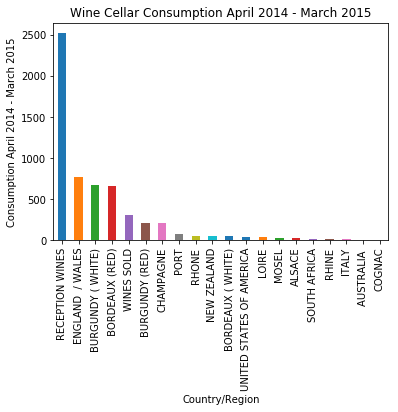

In [16]:
max_consumption = plotting_data_df['Consumption April 2014 - March 2015'].max()

plotting_data_df['Consumption April 2014 - March 2015'] \
    .sort_values(ascending=False) \
    .plot.bar(ylim=[0, max_consumption*1.05])

plt.xlabel('Country/Region')
plt.ylabel('Consumption April 2014 - March 2015')
plt.title('Wine Cellar Consumption April 2014 - March 2015')

<p>I find that &quot;RECEPTION WINES&quot; dominates over the chart, and makes it difficult to read consumption by other country/regions.</p>

<p>Although, that&#39;s not what the question asked me to do - I could easily just reduce the range of the y-axis, by modifying the <code>max_consumption*1.05</code>part, in order to make the other (other than &quot;RECEPTION WINES&quot;) values more readable.</p>

<p>If I had a choice of another type of chart, to answer the question asked, I&#39;d decide to use a Pareto chart.</p>

<p>I didn&#39;t do it, as the question didn&#39;t ask for it, but I think it&#39;s a good idea to group all colours of &quot;BORDEAUX&quot; and then all colours of &quot;BURGUNDY&quot; together as they presumably come from the same two different regions, regardless of colour. Then the English and Welsh wine would lose its first position to French wine. I don&#39;t have enough information to tell where &quot;RECEPTION WINES&quot; came from, but that could be investigated unless they&#39;re blends, which then could be marked appropriately on the chart.</p>
